In [1]:
import dateutil
import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
n=int(input("Enter the number of stocks :"))

lst=[] #For storing the assets

for i in range(n):
    tick=input("Enter the stock name listed in NSE : ")
    t=tick+'.NS'
    lst.append(t)
    
lst.append('^NSEI')

print(lst)

# Set the start and end date
start_date = '2008-01-01' #NSE Data for Nifty 50 index is available from September 2007
end_date = '2021-08-03'
df=[]
for i in range(len(lst)):
    ticker=lst[i]
    data=yf.download(ticker, start_date, end_date)
    df.append(data)

Enter the number of stocks : 3
Enter the stock name listed in NSE :  SBIN
Enter the stock name listed in NSE :  RELIANCE
Enter the stock name listed in NSE :  INFY


['SBIN.NS', 'RELIANCE.NS', 'INFY.NS', '^NSEI']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data = pd.concat(df, axis=1, ignore_index=False)
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,...,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,224.557953,225.973236,222.312378,224.888199,192.848480,4502158,715.715759,717.944580,702.119629,705.376221,...,217.781250,218.356247,162.871201,2001624,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0.0
2008-01-02,223.803146,231.540009,220.972580,228.648117,196.072723,10764075,707.047913,714.229797,696.225464,708.719543,...,214.050003,218.537506,163.006439,6155056,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0.0
2008-01-03,228.332047,229.964340,224.902344,225.996826,193.799179,5993773,706.304932,725.621826,700.918518,719.108582,...,211.250000,213.631256,159.346924,12425960,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0.0
2008-01-04,242.862259,242.862259,224.274902,225.388260,193.277298,5185640,719.182861,747.861023,719.182861,741.223938,...,210.000000,211.862503,158.027588,6166320,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0.0
2008-01-07,226.322342,229.086853,222.765274,226.718628,194.418152,6612148,736.716675,750.387085,733.051392,747.972473,...,202.875000,204.606247,152.615143,13254200,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0


In [5]:
pf_data=stock_data['Adj Close']
pf_data.head()

pf_data.columns=lst
pf_data.tail()


,SBIN.NS,RELIANCE.NS,INFY.NS,^NSEI
Date,,,,
2021-07-27,429.950012,2055.000000,1588.472412,15746.450195
2021-07-28,425.500000,2037.349976,1591.495483,15709.400391
2021-07-29,441.549988,2053.250000,1602.795410,15778.450195
2021-07-30,431.799988,2035.300049,1596.352539,15763.049805
2021-08-02,434.899994,2072.500000,1617.217651,15885.150391


<AxesSubplot:xlabel='Date'>

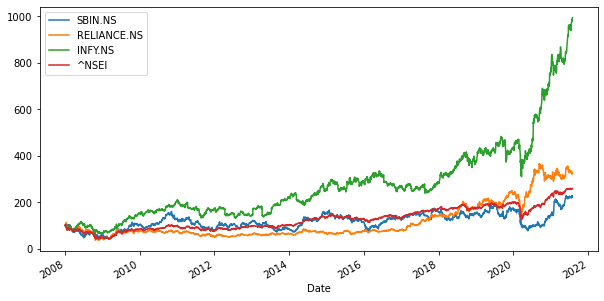

In [6]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))


In [7]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [8]:
log_returns.mean() * 250

SBIN.NS        0.060778
RELIANCE.NS    0.088487
INFY.NS        0.171562
^NSEI          0.063921
dtype: float64

In [11]:
#Calculation of covariance

log_returns.cov() * 250

,SBIN.NS,RELIANCE.NS,INFY.NS,^NSEI
SBIN.NS,0.143775,0.059486,0.027884,0.059236
RELIANCE.NS,0.059486,0.113340,0.034000,0.056483
INFY.NS,0.027884,0.034000,0.094690,0.035225
^NSEI,0.059236,0.056483,0.035225,0.049338


In [12]:
#Calculation of correlation 

log_returns.corr()

,SBIN.NS,RELIANCE.NS,INFY.NS,^NSEI
SBIN.NS,1.000000,0.465999,0.238984,0.702689
RELIANCE.NS,0.465999,1.000000,0.328195,0.751961
INFY.NS,0.238984,0.328195,1.000000,0.514409
^NSEI,0.702689,0.751961,0.514409,1.000000


In [13]:
num_assets = len(lst)
num_assets

4

In [18]:
arr = np.random.random(2)
arr

array([0.28639758, 0.81590521])

In [19]:
arr[0] + arr[1]

1.102302798533411

In [20]:
#Assigning random weights to each stocks

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.03621383, 0.50750262, 0.08645035, 0.3698332 ])

In [21]:
sum(weights)

1.0

In [22]:
#Expected Portfolio Returns

np.sum(weights*log_returns.mean())*250

0.085580199531626

In [23]:
#Expected Portfolio Volatility

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.2592732687934468

In [25]:
#Calculating portfolio returns and portfolio volatilities

pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

#pfolio_returns, pfolio_volatilities

In [26]:
#Converting to DataFrame

portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [27]:
portfolios.head()

,Return,Volatility
0,0.114684,0.235123
1,0.107147,0.236862
2,0.099935,0.234477
3,0.077924,0.278008
4,0.085582,0.252379


Text(0, 0.5, 'Expected Return')

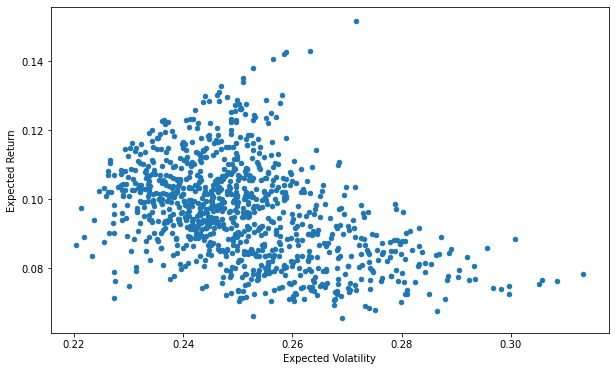

In [28]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')